# dog vs cat with transfer learning

## dependencies

In [14]:
from zipfile import ZipFile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## dataset

In [10]:
# configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# downloading the dataset
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:15<00:00, 37.5MB/s]
100% 812M/812M [00:15<00:00, 54.2MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extracting the entire dataset
ds = "/content/dogs-vs-cats.zip"

with ZipFile(ds, "r") as zip:
  zip.extractall()
  print("extraction complete...............")

extraction complete...............


In [8]:
# extracting the entire dataset
trainds = "/content/train.zip"

with ZipFile(trainds, "r") as zip:
  zip.extractall()
  print("extraction complete...............")

extraction complete...............


In [11]:
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("number of images:", file_count)

number of images: 25000


In [12]:
# images names
file_names = os.listdir("/content/train")
print(file_names)

['cat.6173.jpg', 'dog.12310.jpg', 'cat.7291.jpg', 'cat.4832.jpg', 'dog.11181.jpg', 'cat.7287.jpg', 'dog.10472.jpg', 'cat.2518.jpg', 'dog.183.jpg', 'cat.10551.jpg', 'dog.7764.jpg', 'dog.407.jpg', 'cat.1599.jpg', 'cat.8174.jpg', 'dog.7460.jpg', 'cat.10853.jpg', 'cat.516.jpg', 'cat.2674.jpg', 'cat.4602.jpg', 'dog.8452.jpg', 'cat.759.jpg', 'cat.9212.jpg', 'dog.1873.jpg', 'dog.8538.jpg', 'dog.9042.jpg', 'dog.6813.jpg', 'dog.476.jpg', 'dog.1661.jpg', 'cat.1382.jpg', 'cat.898.jpg', 'cat.4101.jpg', 'cat.5751.jpg', 'cat.11578.jpg', 'dog.6370.jpg', 'cat.58.jpg', 'cat.1105.jpg', 'cat.4719.jpg', 'dog.5481.jpg', 'cat.4983.jpg', 'cat.10864.jpg', 'cat.3830.jpg', 'dog.5570.jpg', 'dog.11838.jpg', 'dog.5569.jpg', 'cat.1190.jpg', 'dog.3620.jpg', 'cat.5209.jpg', 'dog.1669.jpg', 'dog.756.jpg', 'cat.9653.jpg', 'dog.946.jpg', 'cat.10895.jpg', 'cat.7375.jpg', 'cat.10638.jpg', 'dog.7759.jpg', 'cat.5648.jpg', 'cat.2986.jpg', 'dog.9512.jpg', 'dog.805.jpg', 'dog.12409.jpg', 'cat.9195.jpg', 'cat.4253.jpg', 'dog.24

## dataset exploration

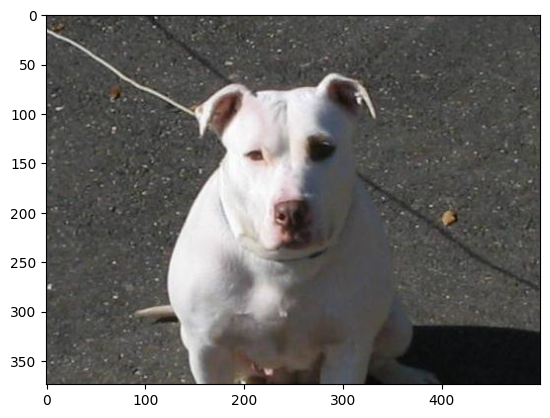

In [16]:
# displaying dog image
img = mpimg.imread("/content/train/dog.12310.jpg")
img_plt = plt.imshow(img)
plt.show()


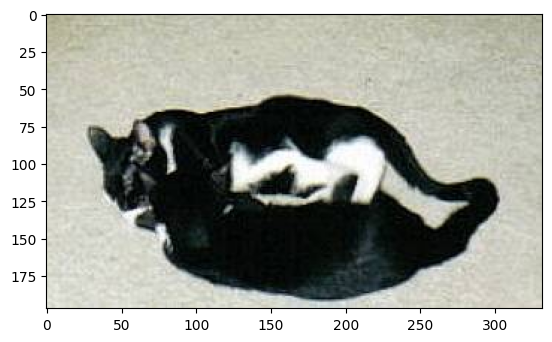

In [17]:
# displaying dog image
img = mpimg.imread("/content/train/cat.7291.jpg")
img_plt = plt.imshow(img)
plt.show()

## images preprocessing

In [22]:
file_names = os.listdir("/content/train/")

for i in range(5):
  name = file_names[i]
  print(name[:3])

cat
dog
cat
cat
dog


In [23]:
file_names = os.listdir("/content/train/")
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == "dog":
    dog_count += 1
  else:
    cat_count += 1
print("dogs: ", dog_count)
print("cats: ", cat_count)

dogs:  12500
cats:  12500


In [24]:
# directory for resized images
os.mkdir("/content/image_resized")

In [25]:
original_folder = "/content/train/"
resized_folder = "/content/image_resized/"

# 2000 images only
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert("RGB")

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
# displaying dog resized image
img = mpimg.imread("/content/image_resized/dog.12310.jpg")
img_plt = plt.imshow(img)
plt.show()